# Animation of Lightning Strikes in BC

### Install Packages

In [1]:
#conda list

### Import Packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from celluloid import Camera
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from IPython.display import HTML
import ffmpeg

from matplotlib import animation, rc

import cartopy
from matplotlib import animation, rc
from pymatreader import read_mat
import pandas as pd
import os

### Laura's Animation Tutorial

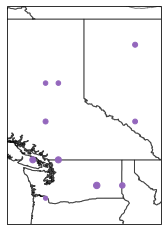

In [3]:
#define the figure (this needs to be in the same cell as the for loop)
fig = plt.figure()
camera = Camera(fig)

ax = plt.axes(projection=ccrs.PlateCarree())

for i in range(15): #I generated 15 random graphs, you will loop over an hour in 5 minute intervals
    #randomly generated lats and lons (I will plot these, you will replace them with your lightning data)
    lat = np.random.randint(45, 60, 10)
    lon = np.random.randint(-125, -115, 10)
    sizes = np.random.randint(10, 50, 10)
    
    #set up the plot "plt.axes" puts a set of axes on the figure, which you can add cartopy features to
    ax.set_extent([-126, -114, 44, 61])
    ax.add_feature(cfeature.COASTLINE, linestyle="-", alpha = .5)
    ax.add_feature(cfeature.STATES, linestyle='-', alpha=.5)

    #do a scatter plot of the points
    plt.scatter(lon, lat, s=sizes)
    camera.snap() 
    
animation = camera.animate(interval = 400, repeat = True,
                           repeat_delay = 500, blit=True)
#interval is how long to wait (in miliseconds) between showing each figure. You probably can adjust this to make it match the twitter GIF
#repeat is True if you want the gif to repeat
#repeat_delay is how long (in miliseconds) between the gif ending and starting over
#blit i'm not sure, but it needed to be true for this to work
animation.save('animation_tutorial.gif') #saves the animation to a gif
#HTML(animation.to_html5_video()) #this will show the gif in the jupyter notebook
HTML(animation.to_html5_video())

## Attempting Animation 

### Upload data

In [8]:
A = read_mat('/data2/edworak/data/AE20210628.mat')
june28 = pd.DataFrame(A['data'], columns = ["YYYY", "MM", "DD", "hh", "mm", "ss", "lat", "lon", "resid", "nstn", "Energy (J)", "Energy uncertainty (J)", "nstn_energy"])

B = read_mat('/data2/edworak/data/AE20210629.mat')
june29 = pd.DataFrame(B['data'], columns = ["YYYY", "MM", "DD", "hh", "mm", "ss", "lat", "lon", "resid", "nstn", "Energy (J)", "Energy uncertainty (J)", "nstn_energy"])

C = read_mat('/data2/edworak/data/AE20210630.mat')
june30 = pd.DataFrame(C['data'], columns = ["YYYY", "MM", "DD", "hh", "mm", "ss", "lat", "lon", "resid", "nstn", "Energy (J)", "Energy uncertainty (J)", "nstn_energy"])

D = read_mat('/data2/edworak/data/AE20210701.mat')
july1 = pd.DataFrame(D['data'], columns = ["YYYY", "MM", "DD", "hh", "mm", "ss", "lat", "lon", "resid", "nstn", "Energy (J)", "Energy uncertainty (J)", "nstn_energy"])


lightning = (june28, june29, june30, july1)

OSError: The file /data2/edworak/data/AE20210628.mat does not exist.

### GIF: July 1 Hour 2 

NameError: name 'july1' is not defined

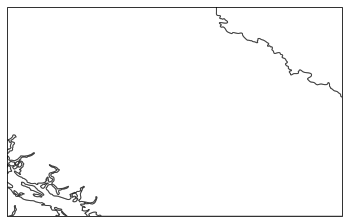

In [5]:
fig = plt.figure()
camera = Camera(fig)

mins = range(0, 61, 5)
ax = plt.axes(projection=ccrs.PlateCarree())

for i in mins: 
    
    ax.set_extent([-125,-117,49,54])
    ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
    ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5)
    ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)
    time = july1[(july1["hh"] == 2) & (july1["mm"] > i) & (july1["mm"] < i + 5) & (july1["Energy (J)"] > 0)]
    points = (time.loc[(time.lon > -130) & (time.lon < -100) & (time.lat > 45) & (time.lat < 65)])
    
    plt.scatter(x = points["lon"], y = points["lat"], c = points["Energy (J)"], cmap="hot_r", s = points["Energy (J)"] * 0.5, edgecolors="black", marker = 'o', alpha=0.5)
    plt.title("July 1 H 2: 5 M interval", fontsize = 18)

    camera.snap() 
    
animation = camera.animate(interval = 400, repeat = True, repeat_delay = 500, blit=True)

animation.save('animation_july1_hour2.gif') 
HTML(animation.to_html5_video())

### Animation: June 30, hours 20 - 24, 10 min interval

NameError: name 'june30' is not defined

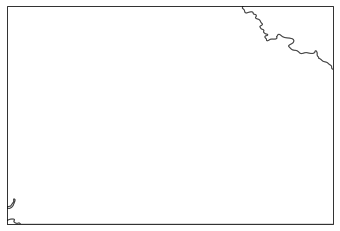

In [6]:
fig = plt.figure()
camera = Camera(fig)

hours = range(21,25,1)
mins = range(0, 61, 10)

ax = plt.axes(projection=ccrs.PlateCarree())

for i in hours: 
    for j in mins: 
    
        ax.set_extent([-123,-117,49,53])
        ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
        ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5)
        ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)
        time = june30[(june30["hh"] == i) & (june30["mm"] > j) & (june30["mm"] < j + 5) & (june30["Energy (J)"] > 0)]
        points = (time.loc[(time.lon > -130) & (time.lon < -100) & (time.lat > 45) & (time.lat < 65)])

        plt.scatter(x = points["lon"], y = points["lat"], c = points["Energy (J)"], cmap="hot_r", s = points["Energy (J)"] * 0.5, edgecolors="black", marker = 'o', alpha=0.5)
        plt.title("June 30 H 21-25: 10 M interval", fontsize = 18)
        camera.snap() 

animation = camera.animate(interval = 300, repeat = True, repeat_delay = 500, blit=True)

animation.save('animation_june30_hr20to24.gif', dpi = 200) 
HTML(animation.to_html5_video())

### Animation: July 1, Hours 0 - 6, 10 min interval

In [ ]:
fig = plt.figure()
camera = Camera(fig)

hours = range(0,6,1)
mins = range(0, 61, 10)

ax = plt.axes(projection=ccrs.PlateCarree())

for i in hours: 
    for j in mins: 
        
        ax.set_extent([-123,-117,49,53])
        ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
        ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5)
        ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)
        time = july1[(july1["hh"] == i) & (july1["mm"] > j) & (july1["mm"] < j + 5) & (july1["Energy (J)"] > 0)]
        points = (time.loc[(time.lon > -130) & (time.lon < -100) & (time.lat > 45) & (time.lat < 65)])

        plt.scatter(x = points["lon"], y = points["lat"], c = points["Energy (J)"], cmap="hot_r", s = points["Energy (J)"] * 0.5, edgecolors="black", marker = 'o', alpha=0.5)
        plt.title("July 1 H 0 -6: 10 M interval", fontsize = 18)
        camera.snap() 

animation = camera.animate(interval = 400, repeat = True, repeat_delay = 500, blit=True)

animation.save('animation_july1_hr0to6.gif', dpi = 200) 
HTML(animation.to_html5_video())

### Matching Dave's gif

Time range: 21:30 June 30 - 05:30 July 1 <br>
Longitude: 145 W to 105 W (or 140 W to 110 W) <br>
Latitude: 48 N to 67 N (or 50 N to 65 N)<br>

[GIF Link]("https://docs.google.com/presentation/d/1-x85H8fvgbwm23UOSPhWB5w5tta5wzLi/edit#slide=id.p1")

In [ ]:
# fig = plt.figure()
# camera = Camera(fig)


# june30_hours = range(21,25,1)
# june30_mins = range(0, 61, 10)

# july1_hours = range(0,6,1)
# july1_mins = range(0, 61, 10)

# df = june30 + july1

# june30_july1_hours = [june30_hours, july1_hours]
# june30_july1_mins = [june30_mins, july1_mins]

# ax = plt.axes(projection=ccrs.PlateCarree())


# for i in june30_july1_hours: 
#     for j in june30_july1_mins: 
#         ax.set_extent([-145,-105,48,67])
#         ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
#         ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5)
#         ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)
#         june30_time = june30[(june30["hh"] == i) & (june30["mm"] > j) & (june30["mm"] < j + 5) & (june30["Energy (J)"] > 0)]
#         july1_time = july1[(july1["hh"] == i) & (july1["mm"] > j) & (july1["mm"] < j + 5) & (july1["Energy (J)"] > 0)]

#         june30_points = (june30_time.loc[(june30_time.lon > -130) & (june30_time.lon < -100) & (june30_time.lat > 45) & (june30_time.lat < 65)])
#         july1_points = (july1_time.loc[(july1_time.lon > -130) & (july1_time.lon < -100) & (july1_time.lat > 45) & (july1_time.lat < 65)])

#         plt.scatter(x = points["lon"], y = points["lat"], c = points["Energy (J)"], cmap="hot_r", s = points["Energy (J)"] * 0.2, edgecolors="black", marker = 'o', alpha=0.5)
#         plt.title("June 30 July 1", fontsize = 18)
#         camera.snap() 
        
        
# animation = camera.animate(interval = 400, repeat = True, repeat_delay = 500, blit=True)

# animation.save('animation_june30_july1.gif', dpi = 200) 
# HTML(animation.to_html5_video())

### Stack overflow for putting mutiple data sets together

#### Using pd.merge() function
- didn't end up working since created a null data frame

In [ ]:
june30_21to24 = june30[(june30["hh"] >= 21) & (june30["hh"] <= 24)]
july1_0to5 = july1[(july1["hh"] >= 0) & (july1["hh"] <= 5.5)]

june30_july1_merge = pd.merge(june30_21to24, july1_0to5)

june30_july1_merge


#### Display function to make things look nice - copied this

In [ ]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [ ]:
display('june30_21to24', 'july1_0to5', "pd.merge(june30_21to24, july1_0to5, on='hh')")


### Using pd.concat() - works! <br>
[Concat and merge]("https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html")

In [ ]:
frames = [june30_21to24, july1_0to5]

june30_july1_concat = pd.concat(frames)

display('june30_21to24', 'july1_0to5', "june30_july1_concat")


- could try to cut the head and tail of data set before :30 and after :30 
- search for index when hour = 21 and minute = 30 
- go from there to last index of 5:30
- should learn date time for the long run <br> 
[datetime]("https://numpy.org/doc/stable/reference/arrays.datetime.html")

- draw box of pyrocb on plot
- x and y label tick mark labels for lat long
- different projection?

### Trying joint animation... again  

In [ ]:
fig = plt.figure(figsize = (10, 12))
camera = Camera(fig)

# june30_july1_concat combines June 30 hours 21 - 24 to July 1 hours 0 - 5
#Longitude: 145 W to 105 W (or 140 W to 110 W)
#Latitude: 48 N to 67 N (or 50 N to 65 N)

hours = [21, 22, 23, 0, 1, 2, 3, 4, 5]
mins = range(0, 60, 10)

ax = plt.axes(projection=ccrs.PlateCarree())

for i in hours: 
    for j in mins: 
        #print("Hour:" + str(i) + ", Minute: " + str(j))

        ax.set_extent([-145,-105,49,70])
        ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
        ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5)
        ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)
        time = june30_july1_concat[(june30_july1_concat["hh"] == i) & (june30_july1_concat["mm"] > j) & (june30_july1_concat["mm"] < j + 5) & (june30_july1_concat["Energy (J)"] > 0)]
        #print(time)
        points = (time.loc[(time.lon > -130) & (time.lon < -100) & (time.lat > 45) & (time.lat < 65)])

        t = plt.scatter(x = points["lon"], y = points["lat"], c = points["Energy (J)"], cmap="hot_r", s = np.log(points["Energy (J)"]), edgecolors="black", marker = 'o', alpha=0.5)
        ax.legend(["Hour:" + str(i) + ", Minute: " + str(j)])
        plt.title("June 30 hour 21 to July 1 hour 6: 10 M interval", fontsize = 18)
        
        camera.snap() 

animation = camera.animate(interval = 400, repeat = True, repeat_delay = 500, blit=True)

animation.save('animation_june30_july1_concat.gif', dpi = 400) 
HTML(animation.to_html5_video())

In [ ]:
time

In [ ]:
t = plt.plot(range(i, i + 5))
    plt.legend(t, [f'line {i}'])